In [1]:
import sympy

sympy.init_printing()

In [2]:
r_tilde, r_tilde_plus = sympy.symbols("\\tilde{r} \\tilde{r}_+")

In [3]:
delta, a = sympy.symbols("\delta a")

In [4]:
a_m, b_m = sympy.symbols("a_m b_m")

#### Determinant

In [5]:
det_g_r = (a_m ** 2 - b_m ** 2) * sympy.sinh(2 * delta) ** 2 - 2 * r_tilde * a_m * sympy.cosh(2 * delta) + (r_tilde ** 2 + 1) * (r_tilde ** 2 + a ** 2)
det_g_r

In [6]:
det_g_i = 2 * b_m * (a_m * sympy.sinh(2 * delta) ** 2 - r_tilde * sympy.cosh(2 * delta))
det_g_i

Evaluate $g_r$ when $b_m = 0$.

In [7]:
det_g_r_b_m_zero = det_g_r.subs({b_m: 0})
det_g_r_b_m_zero

#### $m$

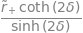

In [8]:
a_m_val = r_tilde_plus * sympy.coth(2 * delta) / sympy.sinh(2 * delta)
a_m_val

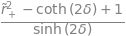

In [9]:
b_m_val = (r_tilde_plus ** 2 - sympy.coth(2 * delta) + 1) / sympy.sinh(2 * delta)
b_m_val

When $b_m = 0$, $\tilde{r}_+$ equals:

In [10]:
r_tilde_plus_b_m_zero = sympy.sqrt(sympy.coth(2 * delta) - 1)
r_tilde_plus_b_m_zero

In [11]:
coth_2_delta_val = r_tilde_plus ** 2 + 1
coth_2_delta_val

Write $a_m$ in terms of $\delta$.

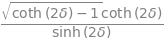

In [12]:
a_m_in_delta = a_m_val.subs({r_tilde_plus: r_tilde_plus_b_m_zero})
a_m_in_delta

In [13]:
# sinh_val = (sympy.exp(2 * delta) - sympy.exp(-2 * delta)) / 2
# coth_val = (sympy.exp(2 * delta) + sympy.exp(-2 * delta)) / (sympy.exp(2 * delta) - sympy.exp(-2 * delta))

In [14]:
# (a_m_in_delta ** 2).subs({sympy.sinh(2 * delta): sinh_val, sympy.coth(2 * delta): coth_val}).expand().simplify().factor()

Write $a_m$ in terms of $\tilde{r}_+$.

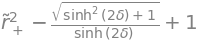

In [15]:
b_m_zero_cond = (r_tilde_plus ** 2 - sympy.cosh(2 * delta) / sympy.sinh(2 * delta) + 1).subs({sympy.cosh(2 * delta): sympy.sqrt(1 + sympy.sinh(2 * delta) ** 2)})
b_m_zero_cond

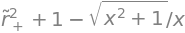

In [16]:
x = sympy.symbols("x")
b_m_zero_cond = r_tilde_plus ** 2 - sympy.sqrt(1 + x ** 2) / x + 1
b_m_zero_cond

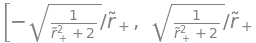

In [17]:
sinh_2_delta_vals = sympy.solve(b_m_zero_cond, x)
sinh_2_delta_vals

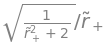

In [18]:
sinh_2_delta_vals[1]

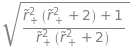

In [19]:
cosh_2_delta_val = sympy.sqrt(1 + sinh_2_delta_vals[1] ** 2).simplify()
cosh_2_delta_val

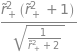

In [20]:
a_m_in_r_tilde_plus = a_m_val.subs({sympy.coth(2 * delta): coth_2_delta_val, sympy.sinh(2 * delta): sinh_2_delta_vals[1]})
a_m_in_r_tilde_plus

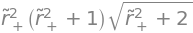

In [21]:
a_m_in_r_tilde_plus = r_tilde_plus ** 2 * (r_tilde_plus ** 2 + 1) * sympy.sqrt(r_tilde_plus ** 2 + 2)
a_m_in_r_tilde_plus

#### $a$

In [22]:
a_val = 2 / (sympy.exp(4 * delta) - 1)
a_val

Write in terms of $\tilde{r}_+$.

In [23]:
delta_val = sympy.acoth(r_tilde_plus ** 2 + 1) / 2
delta_val

Use identity $\text{arccoth}(x) = \frac{1}{2}\ln(\frac{x + 1}{x-1})$.

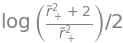

In [24]:
acoth_val = sympy.ln((r_tilde_plus ** 2 + 2) / r_tilde_plus ** 2) / 2
acoth_val

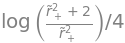

In [25]:
delta_val = delta_val.subs({sympy.acoth(r_tilde_plus ** 2 + 1): acoth_val})
delta_val

In [26]:
a_in_r_tilde_plus = a_val.subs({delta: delta_val}).simplify()
a_in_r_tilde_plus

$a$ is just $\tilde{r}_+^2$.

#### $g_r = 0$

In [27]:
det_g_r_b_m_zero

In [28]:
# det_g_r_simp = det_g_r_b_m_zero.subs({a_m: a_m_in_delta, a: a_val}).expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
# det_g_r_simp

In [29]:
det_g_r_simp = det_g_r_b_m_zero.subs({
    a_m: a_m_in_r_tilde_plus, a: a_in_r_tilde_plus,
    sympy.sinh(2 * delta): sinh_2_delta_vals[1],
    a_m * sympy.cosh(2 * delta): r_tilde_plus * (r_tilde_plus ** 2 + 1) ** 2
})
det_g_r_simp = det_g_r_simp.expand().collect([r_tilde, r_tilde ** 2, r_tilde ** 3, r_tilde ** 4])
det_g_r_simp

In [30]:
A_coeff_val = det_g_r_simp.coeff(r_tilde ** 4)
B_coeff_val = det_g_r_simp.coeff(r_tilde ** 2)
C_coeff_val = det_g_r_simp.coeff(r_tilde)
D_coeff_val = det_g_r_simp - A_coeff_val * r_tilde ** 4 - B_coeff_val * r_tilde ** 2 - C_coeff_val * r_tilde

In [31]:
B_coeff_val

In [32]:
C_coeff_val

In [33]:
D_coeff_val

In [34]:
A, B, C, D = sympy.symbols("A B C D")

In [35]:
det_g_r_quartic = r_tilde ** 4 + B * r_tilde ** 2 + C * r_tilde + D
det_g_r_quartic

In [36]:
sol = sympy.solve(det_g_r_quartic, r_tilde)

In [37]:
sol[3]

⎧                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                                             
⎪                                                   

In [38]:
roots = {}

r_tilde_plus_vals = range(1, 21)

for r_tilde_plus_val in r_tilde_plus_vals:
    root_vals = []
    for i in range(4):
        root = sol[i].subs({B: B_coeff_val, C: C_coeff_val, D: D_coeff_val}).subs({r_tilde_plus: r_tilde_plus_val})
        root_vals.append(root)
    roots[r_tilde_plus_val] = root_vals

In [39]:
roots

In [40]:
root_imag_part = [int(r[1].coeff(sympy.I)) for r in roots.values()]
root_imag_part

In [41]:
import matplotlib.pyplot as plt

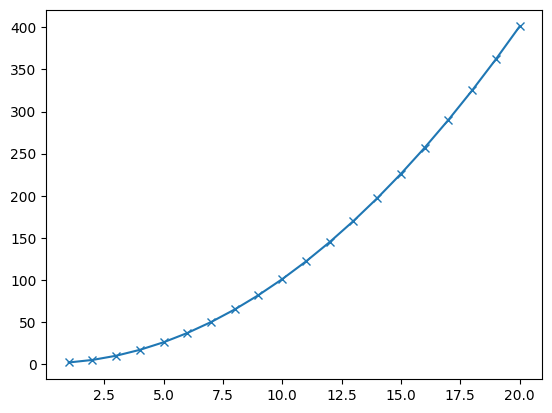

In [42]:
plt.plot(r_tilde_plus_vals, root_imag_part, 'x-');

In [43]:
import numpy as np

In [44]:
np.polyfit(np.array(r_tilde_plus_vals), np.array(root_imag_part), deg=2)

array([1.00000000e+00, 1.43325764e-14, 1.00000000e+00])

In [45]:
[r ** 2 + 1 for r in r_tilde_plus_vals]

The roots are given by:

In [46]:
root_1 = -r_tilde_plus - (r_tilde_plus ** 2 + 1) * sympy.I
root_2 = -r_tilde_plus + (r_tilde_plus ** 2 + 1) * sympy.I
root_3 = r_tilde_plus
root_1, root_2, root_3

In [47]:
det_g_r_simp.subs({r_tilde: root_1}).simplify()

In [48]:
det_g_r_simp.subs({r_tilde: root_2}).simplify()

In [49]:
det_g_r_simp.subs({r_tilde: root_3}).simplify()

In [50]:
r_tilde_plus_val = 5

In [51]:
r_tilde_vals = range(-20, 21)
g_r_vals = []

for r_tilde_val in r_tilde_vals:
    g_r_vals.append(det_g_r_simp.subs({r_tilde_plus: r_tilde_plus_val, r_tilde: r_tilde_val}))

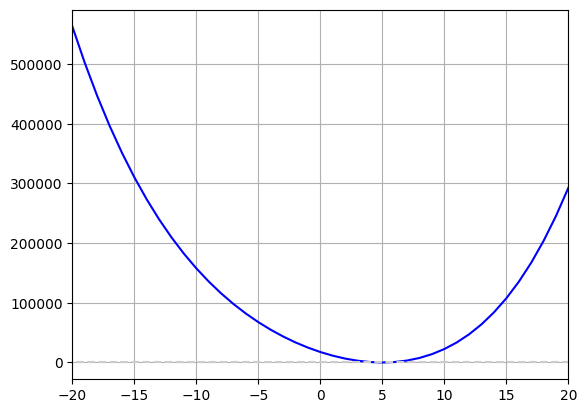

In [52]:
plt.plot(r_tilde_vals, g_r_vals, 'b-')
plt.plot([r_tilde_vals[0] - 5, r_tilde_vals[-1] + 5], [0, 0], '--', c='0.8')
plt.xlim([r_tilde_vals[0], r_tilde_vals[-1]])
plt.grid()
plt.savefig('figures/real_det_g_ads4_bh.png', bbox_inches='tight', dpi=300);